In [1]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from sympy.abc import x, y, z
import numpy as np

1) Найти асимптоты графика функции $g(x) = \frac{24x^3 + 3x - 16}{3x - 2}$  построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

2) Вычислить определенный интеграл  $\int_1^6 \frac{1}{(x-3)^3},\$

In [6]:
class graph:
  def __init__(this):
    this.ax = plt.gca()

  def normalize(this):
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())

  def set_x(this, min, max, numpoints=1000):
    this.X = np.linspace(float(min + (max - min) / numpoints), float(max - (max - min) / numpoints), numpoints)
  def set_y(this, min, max):
    this.ax.set(ylim=(min, max))

  def create_legend(this):
    this.ax.legend(loc='best')

  def draw(this, caller, color, label=True):
    if (label):
      this.ax.plot(this.X, caller(this.X), color=color, label=f"""$f(x) = {sympy.latex(caller(x))}$""")
    else:
      this.ax.plot(this.X, caller(this.X), color=color)
  def draw_with_asymptots(this, caller):
    vertical = [*sympy.calculus.util.continuous_domain(caller(x), x, S.Reals).symmetric_difference(S.Reals).boundary]

    X = this.X.tolist()
    for i in range(len(vertical)):
      if (vertical[i] < X[0] or vertical[i] > X[len(X) - 1]):
        continue
      if (i == 0):
        this.set_x(X[0], vertical[i])
      else:
        this.set_x(vertical[i - 1], vertical[i])
      this.draw(caller, "blue", label=False)
    this.set_x(vertical[len(vertical) - 1], X[len(X) - 1])
    this.draw(caller, "blue")
    
    for i in range(len(vertical)):
        this.ax.axvline(x=vertical[i], label=f"""Асимптота. x={vertical[i]}""", linestyle='dashed', color='red')
    
    l_pos = sympy.limit(caller(x), x, sympy.oo)
    if (l_pos != sympy.oo and l_pos != -sympy.oo):
        this.ax.plot(X, [l_pos for i in range(len(X))], label=f"""Асимптота. y={l_pos}""", linestyle='dashed', color='red')
    l_neg = sympy.limit(caller(x), x, -sympy.oo)
    if (l_neg != sympy.oo and l_neg != -sympy.oo):
        this.ax.plot(X, [l_neg for i in range(len(X))], label=f"""Асимптота. y={l_neg}""", linestyle='dashed', color='red')
          
    kpos = sympy.limit(caller(x)/x, x, +sympy.oo)
    kneg = sympy.limit(caller(x)/x, x, -sympy.oo)
    if ((kpos == sympy.oo or kpos == -sympy.oo) and (kneg == sympy.oo or kneg == -sympy.oo)):
      return
    if kpos == kneg:
      k = kpos
    else:
      k = (kneg, kpos)
    b = sympy.limit(caller(x) - k*x, x, sympy.oo)
    asimp = k * x + b
    this.ax.plot(X, [asimp.subs(x, X[i]) for i in range(len(X))], label=f"""$Асимптота. y={sympy.latex(asimp)}$""", linestyle='dashed', color='red')

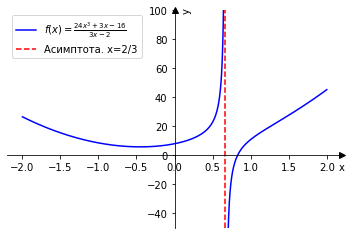

In [7]:
def g(x):
  return((24 * (x ** 3) + 3 * x - 16) / (3 * x - 2))
pic = graph()
pic.set_x(-2, 2)
pic.set_y(-50, 100)
pic.draw_with_asymptots(g)
pic.create_legend()
pic.normalize()

Integral((x - 3)**(-3), (x, 1, 6))

Divergent!


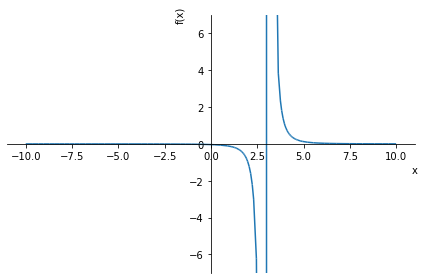

In [15]:
f = 1 / (x - 3) ** 3

display(sympy.Integral(f, (x, 1, 6)))
if (sympy.Integral(f, (x, 1, 6)).doit() == sympy.nan):
  print("\033[91mDivergent!")
  sympy.plot(f, ylim=(-7, 7))
else:
  display(sympy.Integral(f, (x, 1, 6)).doit())